In [1]:
import pandas as pd
import numpy as np
import scipy as ss
import scipy.stats as ss
from scipy.stats import norm

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import math

import scipy.optimize as so
from scipy.optimize import fsolve
from scipy import sparse

from scipy.sparse import diags

In [92]:
L=2*np.pi #period
nx=100 #number of space steps
nx = 50
x = np.linspace(0,L,nx) #define space
dx = L/(nx-1) #defining mesh grid width for space
nt = 100 #number of time steps
t = np.linspace(0,0.5,nt) #define time
dt = 10e-3 #defining mesh grid width for time


### parameters ###

alpha=1
beta=1/4
sigma=1
c=alpha-beta
miou=0.2
delta=0.0002
parameters=[['alpha',alpha],['beta',beta],['sigma',sigma]]
a1 = 1e-3
a0=-sigma*a1**2/(2*c)
a2=(-sigma*a1**2)/(2*(-4*alpha+16*beta+c))
a3=-sigma/(2*(-alpha*3**2+beta*3**4+c))*(2*a2*a1)
a4=(-sigma*a2**2-2*sigma*a1*a3)/(2*(-alpha*4**2+beta*4**4+c))
u0=a0+a1*np.cos(x)+a2*np.cos(2*x)+a3*np.cos(3*x)+a4*np.cos(4*x)
u = u0+delta*np.cos(miou*x)*(np.cos(2*x)+np.cos(x)+np.cos(3*x))

ufull=np.zeros([nx,nt])  #define the solution matrix

In [85]:
### finite difference coefficients, 4th order accuracy ### 


###SKIP THIS CELL FOR 6TH ORDER ACCURACY###


#third derivative
c1=1/16
c2=1/2
c3=13/16


#fifth derivative
b1=1/12
b2=3/4
b3=13/6
b4=29/12

#first derivative
f1=1/24
f2=1/3



A=beta*b1/(dx**5)
B=c1*alpha/(dx**3) - b2*beta/(dx**5) 
C=-c2*alpha/(dx**3) + (beta*b3/(dx**5))
D=alpha*c3/(dx**3) - beta*b4/(dx**5)


F=f1/dx
G=f2/dx

print(nx)


def kawahara(U): #U contains the solution
    kawaharaCosEqnsPos=np.zeros(nx,dtype='float64') 
    for i in range (4, nx-4):
    
 
        kawaharaCosEqnsPos[i]=A*(U[i-4]+un[i-4])+B*(U[i-3]+un[i-3])+C*(U[i-2]+un[i-2])+D*(U[i-1]+un[i-1])-D*(U[i+1]+un[i+1])-C*(U[i+2]+un[i+2])-B*(U[i+3]+un[i+3])-A*(U[i+4]+un[i+4])+sigma*(U[i]+un[i])*(F*(U[i-2]+un[i-2])-G*(U[i-1]+un[i-1])+G*(U[i+1]+un[i+1])-F*(U[i+2]+un[i+2]))+c*(F*(U[i-2]+un[i-2])-G*(U[i-1]+un[i-1])+G*(U[i+1]+un[i+1])-F*(U[i+2]+un[i+2]))+1/dt*(un[i]-U[i])   
    
    kawaharaCosEqnsPos[0]=A*(U[nx-5]+un[nx-5])+B*(U[nx-4]+un[nx-4])+C*(U[nx-3]+un[nx-3])+D*(U[nx-2]+un[nx-2])-D*(U[1]+un[0+1])-C*(U[0+2]+un[0+2])-B*(U[0+3]+un[0+3])-A*(U[0+4]+un[0+4])+sigma*(U[0]+un[0])*(F*(U[nx-3]+un[nx-1-2])-G*(U[nx-1-1]+un[nx-1-1])+G*(U[0+1]+un[0+1])-F*(U[0+2]+un[0+2]))+c*(F*(U[nx-1-2]+un[nx-1-2])-G*(U[i-1]+un[i-1])+G*(U[0+1]+un[0+1])-F*(U[0+2]+un[0+2]))+1/dt*(un[0]-U[0])   
    kawaharaCosEqnsPos[1]=A*(U[nx-4]+un[nx-4])+B*(U[nx-3]+un[nx-3])+C*(U[nx-2]+un[nx-2])+D*(U[nx-1]+un[nx-1])-D*(U[1+1]+un[1+1])-C*(U[1+2]+un[1+2])-B*(U[1+3]+un[1+3])-A*(U[1+4]+un[1+4])+sigma*(U[1]+un[1])*(F*(U[nx-2]+un[nx-2])-G*(U[nx-1]+un[nx-1])+G*(U[1+1]+un[1+1])-F*(U[1+2]+un[1+2]))+c*(F*(U[nx-2]+un[nx-2])-G*(U[nx-1]+un[nx-1])+G*(U[1+1]+un[1+1])-F*(U[1+2]+un[1+2]))+1/dt*(un[1]-U[1])   
    kawaharaCosEqnsPos[2]=A*(U[nx-3]+un[nx-3])+B*(U[nx-2]+un[nx-2])+C*(U[nx-1]+un[nx-1])+D*(U[1]+un[1])-D*(U[2+1]+un[2+1])-C*(U[2+2]+un[2+2])-B*(U[2+3]+un[2+3])-A*(U[2+4]+un[2+4])+sigma*(U[2]+un[2])*(F*(U[2-2]+un[2-2])-G*(U[2-1]+un[2-1])+G*(U[2+1]+un[2+1])-F*(U[2+2]+un[2+2]))+c*(F*(U[2-2]+un[2-2])-G*(U[2-1]+un[2-1])+G*(U[2+1]+un[2+1])-F*(U[2+2]+un[2+2]))+1/dt*(un[2]-U[2])   
    kawaharaCosEqnsPos[3]=A*(U[nx-2]+un[nx-2])+B*(U[3-3]+un[3-3])+C*(U[3-2]+un[3-2])+D*(U[3-1]+un[3-1])-D*(U[3+1]+un[3+1])-C*(U[3+2]+un[3+2])-B*(U[3+3]+un[3+3])-A*(U[3+4]+un[3+4])+sigma*(U[3]+un[3])*(F*(U[3-2]+un[3-2])-G*(U[3-1]+un[3-1])+G*(U[3+1]+un[3+1])-F*(U[3+2]+un[3+2]))+c*(F*(U[3-2]+un[3-2])-G*(U[3-1]+un[3-1])+G*(U[3+1]+un[3+1])-F*(U[3+2]+un[3+2]))+1/dt*(un[3]-U[3])   
    
    kawaharaCosEqnsPos[nx-4]=A*(U[nx-4-4]+un[nx-4-4])+B*(U[nx-4-3]+un[nx-4-3])+C*(U[nx-4-2]+un[nx-4-2])+D*(U[nx-4-1]+un[nx-4-1])-D*(U[nx-4+1]+un[nx-4+1])-C*(U[nx-4+2]+un[nx-4+2])-B*(U[nx-4+3]+un[nx-4+3])-A*(U[1]+un[1])+sigma*(U[nx-4]+un[nx-4])*(F*(U[nx-4-2]+un[nx-4-2])-G*(U[nx-4-1]+un[nx-4-1])+G*(U[nx-4+1]+un[nx-4+1])-F*(U[nx-4+2]+un[nx-4+2]))+c*(F*(U[nx-4-2]+un[nx-4-2])-G*(U[nx-4-1]+un[nx-4-1])+G*(U[nx-4+1]+un[nx-4+1])-F*(U[nx-4+2]+un[nx-4+2]))+1/dt*(un[nx-4]-U[nx-4])   
    kawaharaCosEqnsPos[nx-3]=A*(U[nx-3-4]+un[nx-3-4])+B*(U[nx-3-3]+un[nx-3-3])+C*(U[nx-3-2]+un[nx-3-2])+D*(U[nx-3-1]+un[nx-3-1])-D*(U[nx-3+1]+un[nx-3+1])-C*(U[nx-3+2]+un[nx-3+2])-B*(U[1]+un[1])-A*(U[2]+un[2])+sigma*(U[nx-3]+un[nx-3])*(F*(U[nx-3-2]+un[nx-3-2])-G*(U[nx-3-1]+un[nx-3-1])+G*(U[nx-3+1]+un[nx-3+1])-F*(U[nx-3+2]+un[nx-3+2]))+c*(F*(U[nx-3-2]+un[nx-3-2])-G*(U[nx-3-1]+un[nx-3-1])+G*(U[nx-3+1]+un[nx-3+1])-F*(U[nx-3+2]+un[nx-3+2]))+1/dt*(un[nx-3]-U[nx-3])   
    kawaharaCosEqnsPos[nx-2]=A*(U[nx-2-4]+un[nx-2-4])+B*(U[nx-2-3]+un[nx-2-3])+C*(U[nx-2-2]+un[nx-2-2])+D*(U[nx-2-1]+un[nx-2-1])-D*(U[nx-2+1]+un[nx-2+1])-C*(U[1]+un[1])-B*(U[2]+un[2])-A*(U[3]+un[3])+sigma*(U[nx-2]+un[nx-2])*(F*(U[nx-2-2]+un[nx-2-2])-G*(U[nx-2-1]+un[nx-2-1])+G*(U[nx-2+1]+un[nx-2+1])-F*(U[1]+un[1]))+c*(F*(U[nx-2-2]+un[nx-2-2])-G*(U[nx-2-1]+un[nx-2-1])+G*(U[nx-2+1]+un[nx-2+1])-F*(U[1]+un[1]))+1/dt*(un[nx-2]-U[nx-2])   
    kawaharaCosEqnsPos[nx-1]= kawaharaCosEqnsPos[0]
        
  
    return kawaharaCosEqnsPos
                                                                                                                 
                                                                                                           

50


In [72]:
### finite difference coefficients, 6th order accuracy ### 

###SKIP THIS CELL FOR 4TH ORDER ACCURACY###

#third derivative
c1=7/480
c2=3/20
c3=169/240
c4=61/60

#fifth derivative
b1=13/576
b2=19/72
b3=87/64
b4=13/4
b5=323/96

#first derivative
f1=1/120
f2=3/40
f3=3/8



A=beta*b1/(dx**5)
B=-c1*alpha/(dx**3) + b2*beta/(dx**5) 
C=c2*alpha/(dx**3) - (beta*b3/(dx**5))
D=-alpha*c3/(dx**3) + beta*b4/(dx**5)
E=alpha*c4/(dx**3) -(beta*b5/(dx**5))

F=f1/dx
G=f2/dx
H=f3/dx

def kawahara(U): #U contains the solution
    kawaharaCosEqnsPos=np.zeros(nx,dtype='float64') 
    for i in range (5, nx-5):
    
 
        kawaharaCosEqnsPos[i]=-A*(U[i-5]+un[i-5])+B*(U[i-4]+un[i-4])+C*(U[i-3]+un[i-3])+D*(U[i-2]+un[i-2])+E*(U[i-1]+un[i-1])-E*(U[i+1]+un[i+1])-D*(U[i+2]+un[i+2])-C*(U[i+3]+un[i+3])-B*(U[i+4]+un[i+4])+A*(U[i+5]+un[i+5])+sigma*(U[i]+un[i])*(-F*(U[i-3]+un[i-3])+G*(U[i-2]+un[i-2])-H*(U[i-1]+un[i-1])+H*(U[i+1]+un[i+1])-G*(U[i+2]+un[i+2])+F*(U[i+3]+un[i+3]))+c*(-F*(U[i-3]+un[i-3])+G*(U[i-2]+un[i-2])-H*(U[i-1]+un[i-1])+H*(U[i+1]+un[i+1])-G*(U[i+2]+un[i+2])+F*(U[i+3]+un[i+3]))+1/dt*(un[i]-U[i])   
    2
    kawaharaCosEqnsPos[0]=-A*(U[nx-6]+un[nx-6])+B*(U[nx-5]+un[nx-5])+C*(U[nx-4]+un[nx-4])+D*(U[nx-3]+un[nx-3])+E*(U[nx-2]+un[nx-2])-E*(U[1]+un[1])-D*(U[2]+un[2])-C*(U[3]+un[3])-B*(U[4]+un[4])+A*(U[5]+un[5])+sigma*(U[0]+un[0])*(-F*(U[nx-4]+un[nx-4])+G*(U[nx-3]+un[nx-3])-H*(U[nx-2]+un[nx-2])+H*(U[1]+un[1])-G*(U[2]+un[2])+F*(U[3]+un[3]))+c*(-F*(U[nx-4]+un[nx-4])+G*(U[nx-3]+un[nx-3])-H*(U[nx-2]+un[nx-2])+H*(U[1]+un[1])-G*(U[2]+un[2])+F*(U[3]+un[3]))+1/dt*(un[0]-U[0])
    kawaharaCosEqnsPos[1]=-A*(U[nx-5]+un[nx-5])+B*(U[nx-4]+un[nx-4])+C*(U[nx-3]+un[nx-3])+D*(U[nx-2]+un[nx-2])+E*(U[nx-1]+un[nx-1])-E*(U[2]+un[2])-D*(U[3]+un[3])-C*(U[4]+un[4])-B*(U[5]+un[5])+A*(U[6]+un[6])+sigma*(U[1]+un[1])*(-F*(U[nx-3]+un[nx-3])+G*(U[nx-2]+un[nx-2])-H*(U[nx-1]+un[nx-1])+H*(U[2]+un[2])-G*(U[3]+un[3])+F*(U[4]+un[4]))+c*(-F*(U[nx-3]+un[nx-3])+G*(U[nx-2]+un[nx-2])-H*(U[nx-1]+un[nx-1])+H*(U[2]+un[2])-G*(U[3]+un[3])+F*(U[4]+un[4]))+1/dt*(un[1]-U[1])
    kawaharaCosEqnsPos[2]=-A*(U[nx-4]+un[nx-4])+B*(U[nx-3]+un[nx-3])+C*(U[nx-2]+un[nx-2])+D*(U[nx-1]+un[nx-1])+E*(U[1]+un[1])-E*(U[3]+un[3])-D*(U[4]+un[4])-C*(U[5]+un[5])-B*(U[6]+un[6])+A*(U[7]+un[7])+sigma*(U[2]+un[2])*(-F*(U[nx-2]+un[nx-2])+G*(U[nx-1]+un[nx-1])-H*(U[1]+un[1])+H*(U[i+1]+un[3])-G*(U[3]+un[4])+F*(U[5]+un[5]))+c*(-F*(U[nx-2]+un[nx-2])+G*(U[nx-1]+un[nx-1])-H*(U[1]+un[1])+H*(U[3]+un[3])-G*(U[4]+un[4])+F*(U[5]+un[5]))+1/dt*(un[2]-U[2])
    kawaharaCosEqnsPos[3]=-A*(U[nx-3]+un[nx-3])+B*(U[nx-2]+un[nx-2])+C*(U[nx-1]+un[nx-1])+D*(U[1]+un[1])+E*(U[2]+un[2])-E*(U[4]+un[4])-D*(U[5]+un[5])-C*(U[6]+un[6])-B*(U[7]+un[7])+A*(U[8]+un[8])+sigma*(U[3]+un[3])*(-F*(U[nx-1]+un[nx-1])+G*(U[i-2]+un[1])-H*(U[2]+un[2])+H*(U[4]+un[4])-G*(U[5]+un[5])+F*(U[6]+un[6]))+c*(-F*(U[nx-1]+un[nx-1])+G*(U[1]+un[1])-H*(U[2]+un[2])+H*(U[4]+un[4])-G*(U[5]+un[5])+F*(U[6]+un[6]))+1/dt*(un[3]-U[3])
    kawaharaCosEqnsPos[4]=-A*(U[nx-2]+un[nx-2])+B*(U[nx-1]+un[nx-1])+C*(U[1]+un[1])+D*(U[2]+un[2])+E*(U[3]+un[3])-E*(U[5]+un[5])-D*(U[6]+un[6])-C*(U[7]+un[7])-B*(U[8]+un[8])+A*(U[9]+un[9])+sigma*(U[4]+un[4])*(-F*(U[1]+un[1])+G*(U[2]+un[2])-H*(U[3]+un[3])+H*(U[5]+un[5])-G*(U[6]+un[6])+F*(U[7]+un[7]))+c*(-F*(U[1]+un[1])+G*(U[2]+un[2])-H*(U[3]+un[3])+H*(U[5]+un[5])-G*(U[6]+un[6])+F*(U[7]+un[7]))+1/dt*(un[4]-U[4])
    
    kawaharaCosEqnsPos[nx-5]=-A*(U[nx-10]+un[nx-10])+B*(U[nx-9]+un[nx-9])+C*(U[nx-8]+un[nx-8])+D*(U[nx-7]+un[nx-7])+E*(U[nx-6]+un[nx-6])-E*(U[nx-4]+un[nx-4])-D*(U[nx-3]+un[nx-3])-C*(U[nx-2]+un[nx-2])-B*(U[nx-1]+un[nx-1])+A*(U[1]+un[1])+sigma*(U[nx-5]+un[nx-5])*(-F*(U[nx-8]+un[nx-8])+G*(U[nx-7]+un[nx-7])-H*(U[nx-6]+un[nx-6])+H*(U[nx-4]+un[nx-4])-G*(U[nx-3]+un[nx-3])+F*(U[nx-2]+un[nx-2]))+c*(-F*(U[nx-8]+un[nx-8])+G*(U[nx-7]+un[nx-7])-H*(U[nx-6]+un[nx-6])+H*(U[nx-4]+un[nx-4])-G*(U[nx-3]+un[nx-3])+F*(U[nx-2]+un[nx-2]))+1/dt*(un[nx-5]-U[nx-5])
    kawaharaCosEqnsPos[nx-4]=-A*(U[nx-9]+un[nx-9])+B*(U[nx-8]+un[nx-8])+C*(U[nx-7]+un[nx-7])+D*(U[nx-6]+un[nx-6])+E*(U[nx-5]+un[nx-5])-E*(U[nx-3]+un[nx-3])-D*(U[nx-2]+un[nx-2])-C*(U[nx-1]+un[nx-1])-B*(U[1]+un[1])+A*(U[2]+un[2])+sigma*(U[nx-4]+un[nx-4])*(-F*(U[nx-7]+un[nx-7])+G*(U[nx-6]+un[nx-6])-H*(U[nx-5]+un[nx-5])+H*(U[nx-3]+un[nx-3])-G*(U[nx-2]+un[nx-2])+F*(U[nx-1]+un[nx-1]))+c*(-F*(U[nx-7]+un[nx-7])+G*(U[nx-6]+un[nx-6])-H*(U[nx-5]+un[nx-5])+H*(U[nx-3]+un[nx-3])-G*(U[nx-2]+un[nx-2])+F*(U[nx-1]+un[nx-1]))+1/dt*(un[nx-4]-U[nx-4])
    kawaharaCosEqnsPos[nx-3]=-A*(U[nx-8]+un[nx-8])+B*(U[nx-7]+un[nx-7])+C*(U[nx-6]+un[nx-6])+D*(U[nx-5]+un[nx-5])+E*(U[nx-4]+un[nx-4])-E*(U[nx-2]+un[nx-2])-D*(U[nx-1]+un[nx-1])-C*(U[1]+un[1])-B*(U[2]+un[2])+A*(U[3]+un[3])+sigma*(U[nx-3]+un[nx-3])*(-F*(U[nx-6]+un[nx-6])+G*(U[nx-5]+un[nx-5])-H*(U[nx-4]+un[nx-4])+H*(U[nx-2]+un[nx-2])-G*(U[nx-1]+un[nx-1])+F*(U[1]+un[1]))+c*(-F*(U[nx-6]+un[nx-6])+G*(U[nx-5]+un[nx-5])-H*(U[nx-4]+un[nx-4])+H*(U[nx-2]+un[nx-2])-G*(U[nx-1]+un[nx-1])+F*(U[1]+un[1]))+1/dt*(un[nx-3]-U[nx-3])
    kawaharaCosEqnsPos[nx-2]=-A*(U[nx-7]+un[nx-7])+B*(U[nx-6]+un[nx-6])+C*(U[nx-5]+un[nx-5])+D*(U[nx-4]+un[nx-4])+E*(U[nx-3]+un[nx-3])-E*(U[nx-1]+un[nx-1])-D*(U[1]+un[1])-C*(U[2]+un[2])-B*(U[3]+un[3])+A*(U[4]+un[4])+sigma*(U[nx-2]+un[nx-2])*(-F*(U[nx-5]+un[nx-5])+G*(U[nx-4]+un[nx-4])-H*(U[nx-3]+un[nx-3])+H*(U[nx-1]+un[nx-1])-G*(U[1]+un[1])+F*(U[2]+un[2]))+c*(-F*(U[nx-5]+un[nx-5])+G*(U[nx-4]+un[nx-4])-H*(U[nx-3]+un[nx-3])+H*(U[nx-1]+un[nx-1])-G*(U[1]+un[1])+F*(U[2]+un[2]))+1/dt*(un[nx-2]-U[nx-2])
    kawaharaCosEqnsPos[nx-1]=-A*(U[nx-6]+un[nx-6])+B*(U[nx-5]+un[nx-5])+C*(U[nx-4]+un[nx-4])+D*(U[nx-3]+un[nx-3])+E*(U[nx-2]+un[nx-2])-E*(U[1]+un[1])-D*(U[2]+un[2])-C*(U[3]+un[3])-B*(U[4]+un[4])+A*(U[5]+un[5])+sigma*(U[nx-1]+un[nx-1])*(-F*(U[nx-4]+un[nx-4])+G*(U[nx-3]+un[nx-3])-H*(U[nx-2]+un[nx-2])+H*(U[1]+un[1])-G*(U[2]+un[2])+F*(U[3]+un[3]))+c*(-F*(U[nx-4]+un[nx-4])+G*(U[nx-3]+un[nx-3])-H*(U[nx-2]+un[nx-2])+H*(U[1]+un[1])-G*(U[2]+un[2])+F*(U[3]+un[3]))+1/dt*(un[nx-1]-U[nx-1])
     
        
  
    return kawaharaCosEqnsPos
                                                                                                                 
                                                                                                           

In [93]:

for n in range(nt): #for every time step
    
    un = u.copy() #copy existing values of u into un
    
    u=fsolve(kawahara, un,xtol=1.e-8)
    ufull[:,n]=u #nth time column
 


delta 0.0002
miou 0.2
a1 0.001
nt: 100 and dt: 0.01
nx: 50 and dx: 0.1282282715750936
[['alpha', 1], ['beta', 0.25], ['sigma', 1]]


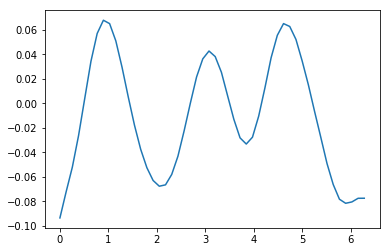

In [118]:
tFinal = 99

# plt.plot(x, np.cos(x-alpha*(tFinal)*dt),'r')
print('delta', delta)
print('miou', miou)
print('a1', a1)
print('nt:',nt,'and dt:',dt)
print('nx:',nx,'and dx:',dx)
print(parameters)

plt.plot(x, ufull[:,tFinal])

In [103]:
from matplotlib import animation, rc
from IPython.display import HTML

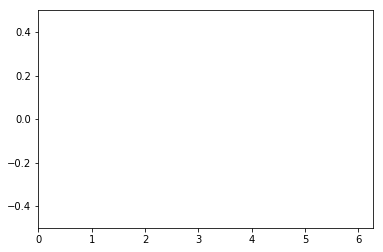

In [112]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-0.5, 0.5))

line, = ax.plot([], [], lw=2)
#line2, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #line2.set_data([], [])
    return (line,)

In [119]:
def animate(i):
    y=ufull[:,i]
    #y2=np.cos(x-alpha*(i+1)*dt)
    line.set_data(x,y)
    #line2.set_data(x,y2)
    return(line,)

In [120]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=99, interval=100) #frames is nt

In [117]:

print('delta', delta)
print('miou', miou)
print('a1', a1)
print('nt:',nt,'and dt:',dt)
print('nx:',nx,'and dx:',dx)
print(parameters)
HTML(anim.to_jshtml())

delta 0.0002
miou 0.2
a1 0.001
nt: 100 and dt: 0.01
nx: 50 and dx: 0.1282282715750936
[['alpha', 1], ['beta', 0.25], ['sigma', 1]]


In [412]:
# def kawahara(U): #U contains the solution
#     kawaharaCosEqnsPos=np.zeros(nx,dtype='float64') 
#     for i in range (5, nx-5):
    
 
#         kawaharaCosEqnsPos[i]=-A*(U[i-5]+un[i-5])+B*(U[i-4]+un[i-4])+C*(U[i-3]+un[i-3])+D*(U[i-2]+un[i-2])+E*(U[i-1]+un[i-1])-E*(U[i+1]+un[i+1])-D*(U[i+2]+un[i+2])-C*(U[i+3]+un[i+3])-B*(U[i+4]+un[i+4])+A*(U[i+5]+un[i+5])+sigma/2*(U[i]+un[i])*(-F*(U[i-3]+un[i-3])+G*(U[i-2]+un[i-2])-H*(U[i-1]+un[i-1])+H*(U[i+1]+un[i+1])-G*(U[i+2]+un[i+2])+F*(U[i+3]+un[i+3]))+1/dt*(un[i]-U[i])
    
#     kawaharaCosEqnsPos[0]=-A*(U[nx-6]+un[nx-6])+B*(U[nx-5]+un[nx-5])+C*(U[nx-4]+un[nx-4])+D*(U[nx-3]+un[nx-3])+E*(U[nx-2]+un[nx-2])-E*(U[1]+un[1])-D*(U[2]+un[2])-C*(U[3]+un[3])-B*(U[4]+un[4])+A*(U[5]+un[5])+sigma/2*(U[0]+un[0])*(-F*(U[nx-4]+un[nx-4])+G*(U[nx-3]+un[nx-3])-H*(U[nx-2]+un[nx-2])+H*(U[1]+un[1])-G*(U[2]+un[2])+F*(U[3]+un[3]))+1/dt*(un[0]-U[0])
#     kawaharaCosEqnsPos[1]=-A*(U[nx-5]+un[nx-5])+B*(U[nx-4]+un[nx-4])+C*(U[nx-3]+un[nx-3])+D*(U[nx-2]+un[nx-2])+E*(U[nx-1]+un[nx-1])-E*(U[2]+un[2])-D*(U[3]+un[3])-C*(U[4]+un[4])-B*(U[5]+un[5])+A*(U[6]+un[6])+sigma/2*(U[1]+un[1])*(-F*(U[nx-3]+un[nx-3])+G*(U[nx-2]+un[nx-2])-H*(U[nx-1]+un[nx-1])+H*(U[2]+un[2])-G*(U[3]+un[3])+F*(U[4]+un[4]))+1/dt*(un[1]-U[1])
#     kawaharaCosEqnsPos[2]=-A*(U[nx-4]+un[nx-4])+B*(U[nx-3]+un[nx-3])+C*(U[nx-2]+un[nx-2])+D*(U[nx-1]+un[nx-1])+E*(U[1]+un[1])-E*(U[3]+un[3])-D*(U[4]+un[4])-C*(U[5]+un[5])-B*(U[6]+un[6])+A*(U[7]+un[7])+sigma/2*(U[2]+un[2])*(-F*(U[nx-2]+un[nx-2])+G*(U[nx-1]+un[nx-1])-H*(U[1]+un[1])+H*(U[i+1]+un[3])-G*(U[3]+un[4])+F*(U[5]+un[5]))+1/dt*(un[2]-U[2])
#     kawaharaCosEqnsPos[3]=-A*(U[nx-3]+un[nx-3])+B*(U[nx-2]+un[nx-2])+C*(U[nx-1]+un[nx-1])+D*(U[1]+un[1])+E*(U[2]+un[2])-E*(U[4]+un[4])-D*(U[5]+un[5])-C*(U[6]+un[6])-B*(U[7]+un[7])+A*(U[8]+un[8])+sigma/2*(U[3]+un[3])*(-F*(U[nx-1]+un[nx-1])+G*(U[i-2]+un[1])-H*(U[2]+un[2])+H*(U[4]+un[4])-G*(U[5]+un[5])+F*(U[6]+un[6]))+1/dt*(un[3]-U[3])
#     kawaharaCosEqnsPos[4]=-A*(U[nx-2]+un[nx-2])+B*(U[nx-1]+un[nx-1])+C*(U[1]+un[1])+D*(U[2]+un[2])+E*(U[3]+un[3])-E*(U[5]+un[5])-D*(U[6]+un[6])-C*(U[7]+un[7])-B*(U[8]+un[8])+A*(U[9]+un[9])+sigma/2*(U[4]+un[4])*(-F*(U[1]+un[1])+G*(U[2]+un[2])-H*(U[3]+un[3])+H*(U[5]+un[5])-G*(U[6]+un[6])+F*(U[7]+un[7]))+1/dt*(un[4]-U[4])
    
#     kawaharaCosEqnsPos[nx-5]=-A*(U[nx-10]+un[nx-10])+B*(U[nx-9]+un[nx-9])+C*(U[nx-8]+un[nx-8])+D*(U[nx-7]+un[nx-7])+E*(U[nx-6]+un[nx-6])-E*(U[nx-4]+un[nx-4])-D*(U[nx-3]+un[nx-3])-C*(U[nx-2]+un[nx-2])-B*(U[nx-1]+un[nx-1])+A*(U[1]+un[1])+sigma/2*(U[nx-5]+un[nx-5])*(-F*(U[nx-8]+un[nx-8])+G*(U[nx-7]+un[nx-7])-H*(U[nx-6]+un[nx-6])+H*(U[nx-4]+un[nx-4])-G*(U[nx-3]+un[nx-3])+F*(U[nx-2]+un[nx-2]))+1/dt*(un[nx-5]-U[nx-5])
#     kawaharaCosEqnsPos[nx-4]=-A*(U[nx-9]+un[nx-9])+B*(U[nx-8]+un[nx-8])+C*(U[nx-7]+un[nx-7])+D*(U[nx-6]+un[nx-6])+E*(U[nx-5]+un[nx-5])-E*(U[nx-3]+un[nx-3])-D*(U[nx-2]+un[nx-2])-C*(U[nx-1]+un[nx-1])-B*(U[1]+un[1])+A*(U[2]+un[2])+sigma/2*(U[nx-4]+un[nx-4])*(-F*(U[nx-7]+un[nx-7])+G*(U[nx-6]+un[nx-6])-H*(U[nx-5]+un[nx-5])+H*(U[nx-3]+un[nx-3])-G*(U[nx-2]+un[nx-2])+F*(U[nx-1]+un[nx-1]))+1/dt*(un[nx-4]-U[nx-4])
#     kawaharaCosEqnsPos[nx-3]=-A*(U[nx-8]+un[nx-8])+B*(U[nx-7]+un[nx-7])+C*(U[nx-6]+un[nx-6])+D*(U[nx-5]+un[nx-5])+E*(U[nx-4]+un[nx-4])-E*(U[nx-2]+un[nx-2])-D*(U[nx-1]+un[nx-1])-C*(U[1]+un[1])-B*(U[2]+un[2])+A*(U[3]+un[3])+sigma/2*(U[nx-3]+un[nx-3])*(-F*(U[nx-6]+un[nx-6])+G*(U[nx-5]+un[nx-5])-H*(U[nx-4]+un[nx-4])+H*(U[nx-2]+un[nx-2])-G*(U[nx-1]+un[nx-1])+F*(U[1]+un[1]))+1/dt*(un[nx-3]-U[nx-3])
#     kawaharaCosEqnsPos[nx-2]=-A*(U[nx-7]+un[nx-7])+B*(U[nx-6]+un[nx-6])+C*(U[nx-5]+un[nx-5])+D*(U[nx-4]+un[nx-4])+E*(U[nx-3]+un[nx-3])-E*(U[nx-1]+un[nx-1])-D*(U[1]+un[1])-C*(U[2]+un[2])-B*(U[3]+un[3])+A*(U[4]+un[4])+sigma/2*(U[nx-2]+un[nx-2])*(-F*(U[nx-5]+un[nx-5])+G*(U[nx-4]+un[nx-4])-H*(U[nx-3]+un[nx-3])+H*(U[nx-1]+un[nx-1])-G*(U[1]+un[1])+F*(U[2]+un[2]))+1/dt*(un[nx-2]-U[nx-2])
#     kawaharaCosEqnsPos[nx-1]=-A*(U[nx-6]+un[nx-6])+B*(U[nx-5]+un[nx-5])+C*(U[nx-4]+un[nx-4])+D*(U[nx-3]+un[nx-3])+E*(U[nx-2]+un[nx-2])-E*(U[1]+un[1])-D*(U[2]+un[2])-C*(U[3]+un[3])-B*(U[4]+un[4])+A*(U[5]+un[5])+sigma/2*(U[nx-1]+un[nx-1])*(-F*(U[nx-4]+un[nx-4])+G*(U[nx-3]+un[nx-3])-H*(U[nx-2]+un[nx-2])+H*(U[1]+un[1])-G*(U[2]+un[2])+F*(U[3]+un[3]))+1/dt*(un[nx-1]-U[nx-1])
     
        
  
#     return kawaharaCosEqnsPos
                                                                                                                 
                                                                                                           

In [998]:
slopeMeasure=np.zeros(int(t.size))
for j in range(t.size):

    slopeMeasure[j]=np.log(np.max(np.abs((ufull[:,j]-u0)/delta)))
   
    

delta 0.0012
miou 0.4
a1 0.001
nt: 2000 and dt: 0.01
nx: 100 and dx: 0.06346651825433926
[['alpha', 1], ['beta', 0.25], ['sigma', 1]]


Text(0,0.5,'lamda*t + log(u1)')

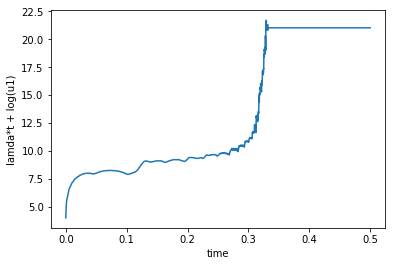

In [999]:

print('delta', delta)
print('miou', miou)
print('a1', a1)
print('nt:',nt,'and dt:',dt)
print('nx:',nx,'and dx:',dx)
print(parameters)

plt.plot(t,slopeMeasure)
plt.xlabel('time')
plt.ylabel('lamda*t + log(u1)')